# Task 1 - Prediction Using Supervised ML

## Done by - Jyotibrata Haldar
## Data Science and Business Analytics Intern at Spark Foundation

### GRIPJAN21

### To Predict the percentage score of student based on the average study hours per day.

### Data Source: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [163]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
df_data=pd.read_csv("student_data.csv")

In [3]:
df_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [164]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Inference - 1
    * Mean hours of study and Percentage Score obtained is 5.01 Hours and 51.48 respectively
    * 50% of the people have study hours below or upto 4.8 hours and Percentage Score below or upto 47.
    * Std dev in hours is 2.52 and for Percentage Score in 25.28 (std with respect to mean for hours and Percentage Score is 
      similar)

In [148]:
df_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Inference - 2

* To be noted here that dependent(percentage score) and independent variable(study hours per day) have high positive correlation
  of 97.6% between them.

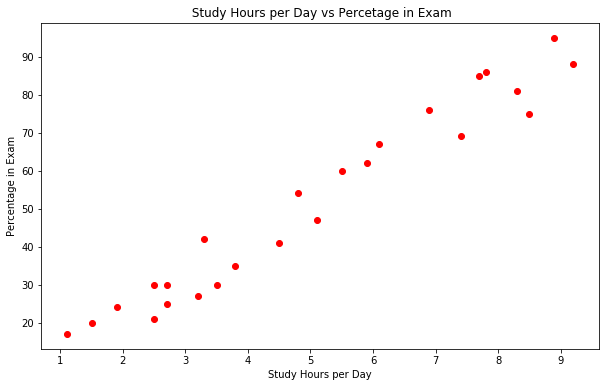

In [119]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df_data.Hours,df_data.Scores,color='r')
plt.title(" Study Hours per Day vs Percetage in Exam")
plt.xlabel("Study Hours per Day")
plt.ylabel("Percentage in Exam")
plt.show()

# Inference - 3
    * The graph above shows a positive corelation between study hours and Percentage Score obtained in exam.

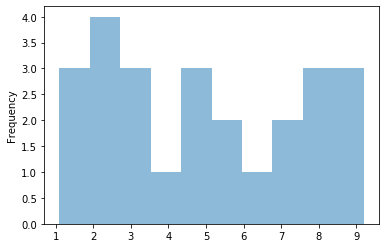

In [24]:
df_data.Hours.plot.hist(bins=10,alpha=0.5)

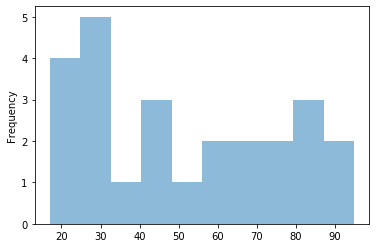

In [25]:
df_data.Scores.plot.hist(bins=10,alpha=0.5)

# Discussion 
    * A linear regression model shall be created. Whole data shall be used to train the data set.
   

In [45]:
X=np.array(df_data.Hours).reshape(-1,1)
y=np.array(df_data.Scores).reshape(-1,1)

In [94]:
# Creating the linear Regression instance variable
lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
# Prediction of marks of students who studies for 9.25 hours per day
y_925=lr.predict(np.array(9.25).reshape(-1,1)).ravel()

In [146]:
print("Score of student who studies 9.25hrs/day is {}".format(np.around(y_925,2)[0]))

Score of student who studies 9.25hrs/day is 92.91


# Further Analysis

    * Due to high correlation between dependent and independent variable further validation may not be required even though
      the data set is small and not normal.
      
    * Still an effort is made to check whether a better slope (Generalized) is present by applying Lasso regression and 
      value of alpha is obtained from Grid Search CV. 

In [150]:
# Initialising Lasso Regression Instance Variable
lasso=Lasso()

In [151]:
params_lasso = {'alpha': [0.01,0.05,0.5,1,2,3]}

In [172]:
grid_obj = GridSearchCV(lasso, params_lasso, scoring='neg_mean_squared_error',refit=True)

In [174]:
grid_obj = grid_obj.fit(X,y)

In [175]:
grid_obj.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [176]:
lasso=Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [177]:
lasso.fit(X,y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [178]:
y_925_las=lasso.predict(np.array(9.25).reshape(-1,1)).ravel()

In [179]:
print("Score of student who studies 9.25hrs/day is {}".format(np.around(y_925_las,3)[0]))

Score of student who studies 9.25hrs/day is 92.564


# Inference - 4

###  Linear Regression predicts that for a student studying 9.25 hrs/day scores  - 92.91% 
###  Lasso Regression predicts that for a student studying 9.25 hrs/day scores   - 92.56% 